# Exercise 2

In [3]:
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt

## 1. ...

In [4]:
p = np.array([7/48, 5/48, 1/8, 1/16, 1/4, 5/16])
n = 10_000

## 2. (a) Crude method

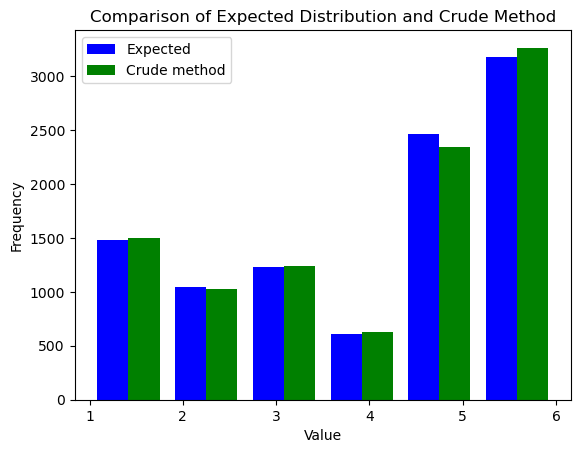

Kolmogorov-Smirnov Test Result:
Test statistic: 0.0082
P-value: 0.8898368093550385


In [8]:
def crude(p, n):
    F = np.cumsum(p)
    X = []
    while len(X) < n:
        u = np.random.uniform(0,1)
        for j in range(len(p)):
            if u <= F[j]:
                X.append(j+1)
                break;
    return X

# Generate expected samples using the built-in discrete random variable
expected_samples = stats.rv_discrete(values=(np.arange(1, 7), p)).rvs(size=n)

# Generate samples using the rejection method
crude_samples = crude(p, n)

# Plot histograms for expected and rejection method samples
plt.hist([expected_samples, crude_samples], bins=6, label=["Expected", "Crude method"], 
         color=["blue", "green"])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Comparison of Expected Distribution and Crude Method')
plt.legend(loc='upper left')
plt.show()

# Perform Kolmogorov-Smirnov test to compare distributions
ts, pvalue = stats.kstest(expected_samples, crude_samples)

# Print the p-value of the KS test
print("Kolmogorov-Smirnov Test Result:")
print(f"Test statistic: {ts}")
print(f"P-value: {pvalue}")

## 2. (b) Rejection method

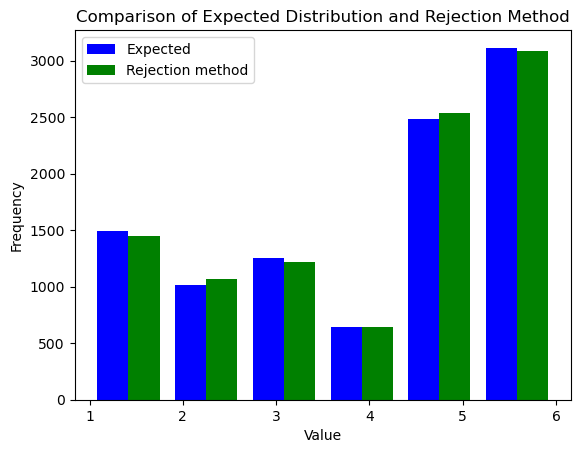

Kolmogorov-Smirnov Test Result:
P-value: 0.9999991845161382


In [6]:
import numpy as np
import math

def rejection(p, n):
    k = len(p)
    q = np.full(k, 1/k)  # Define a uniform proposal distribution q
    C = max(p) / min(q)  # Compute the scaling constant C
    
    X = []
    while len(X) < n:
        u1, u2 = np.random.uniform(0, 1, 2)  # Generate two uniform random numbers
        y = math.floor(k * u1) + 1
        if u2 <= (p[y-1] / C * q[y-1]):
            X.append(y)
            
    return X

# Generate expected samples using the built-in discrete random variable
expected_samples = stats.rv_discrete(values=(np.arange(1, 7), p)).rvs(size=n)

# Generate samples using the rejection method
rejection_samples = rejection(p, n)

# Plot histograms for expected and rejection method samples
plt.hist([expected_samples, rejection_samples], bins=6, label=["Expected", "Rejection method"], 
         color=["blue", "green"])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Comparison of Expected Distribution and Rejection Method')
plt.legend(loc='upper left')
plt.show()

# Perform Kolmogorov-Smirnov test to compare distributions
ts, pvalue = stats.kstest(expected_samples, rejection_samples)

# Print the p-value of the KS test
print("Kolmogorov-Smirnov Test Result:")
print(f"P-value: {pvalue}")


## 2. (c) Alias method

/var/folders/nf/_631w81s0gn239c8z30nfzsh0000gn/T/ipykernel_27513/3440653515.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  L[j] = i


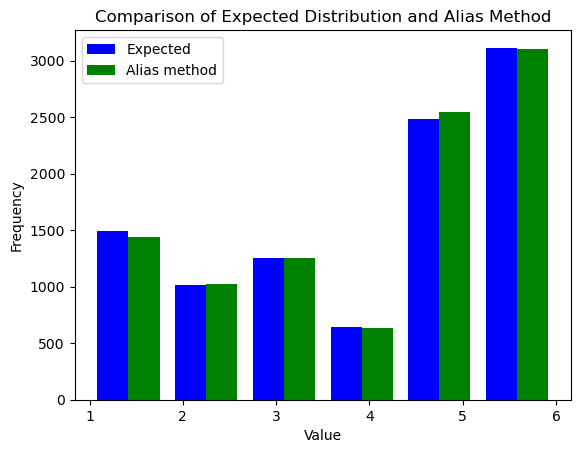

Kolmogorov-Smirnov Test Result:
P-value: 0.9998939179661921


In [7]:
import numpy as np

def alias_tables(p):
    k = len(p)
    L = np.arange(1,k+1)
    F = k*p
    G = np.argwhere(F >= 1) 
    S = np.argwhere(F <= 1)
    
    while len(S) != 0:
        i = G[0]
        j = S[0]
        L[j] = i
        F[i] = F[i] - (1-F[j])
        if F[i] < 1 - 0.001:
            G = np.delete(G,0)
            S = np.append(S,i)
        S = np.delete(S,0)

    return L, F

def alias(L, F, n):
    k = len(F)
    X = []

    for _ in range(n):
        u1 = np.random.uniform(0,1)
        I = math.floor(k*u1)+1
        u2 = np.random.uniform(0,1)
        if u2 <= F[I-1]:
            X.append(I-1)
        else:
            X.append(L[I-1])  
    return [x + 1 for x in X]

# Example usage:
L, F = alias_tables(p)
alias_samples = alias(L, F, n)

# Plot histograms for expected and rejection method samples
plt.hist([expected_samples, alias_samples], bins=6, label=["Expected", "Alias method"], 
         color=["blue", "green"])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Comparison of Expected Distribution and Alias Method')
plt.legend(loc='upper left')
plt.show()

# Perform Kolmogorov-Smirnov test to compare distributions
ts, pvalue = stats.kstest(expected_samples, alias_samples)

# Print the p-value of the KS test
print("Kolmogorov-Smirnov Test Result:")
print(f"P-value: {pvalue}")

## 3. Compare the three different methods using adequate criteria, then discuss the results.

See KS test results and histograms above.

## 4. 